Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [ ]:
NAME = ""
STUDENTID = ""
GROUPID = "";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

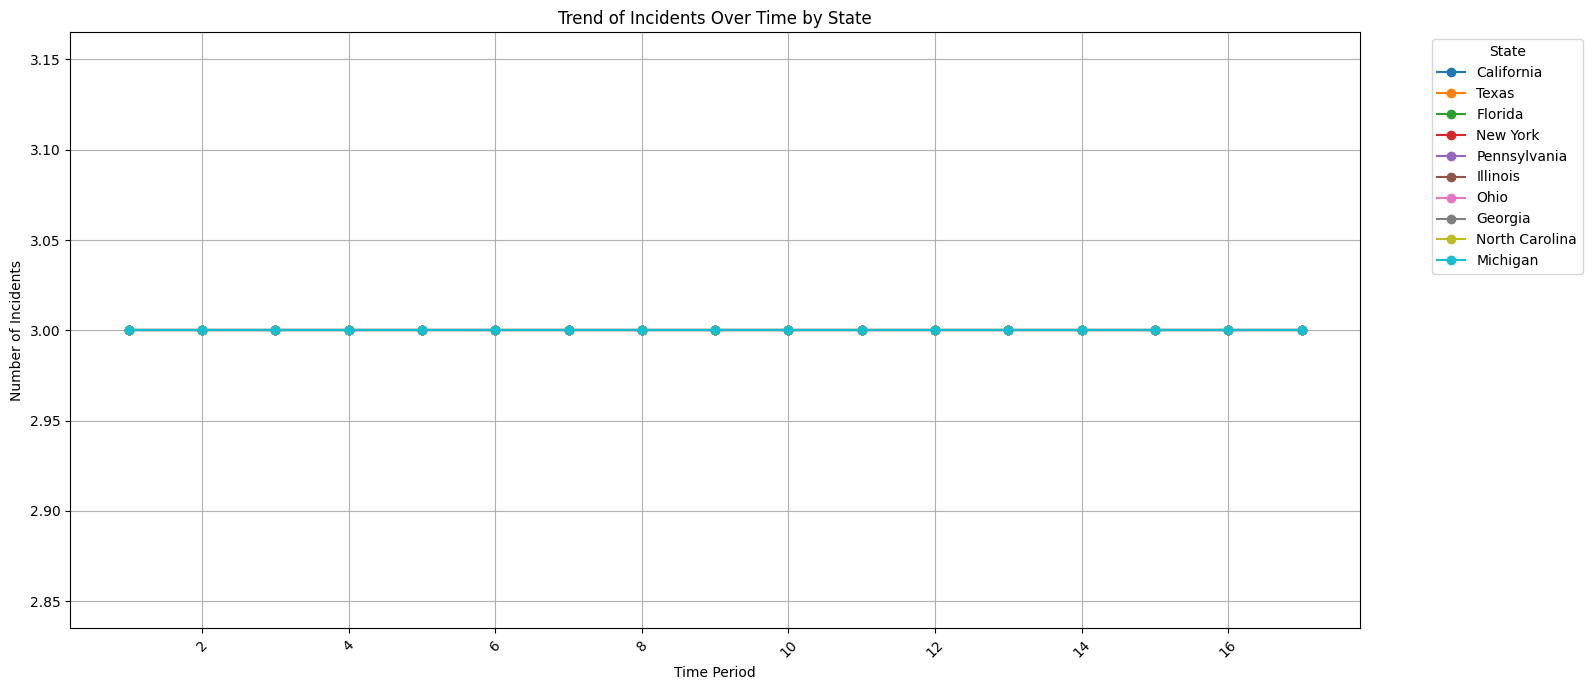

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the file into a dataframe
datan = pd.read_json("data/data_notebook-2_Indicators_of_Anxiety.json")
data = datan.dropna()

# Each row represents an incident, grouping the number of incidents by state and Time Period
state_time_trends = data.groupby(['State', 'Time Period']).size().reset_index(name='Incident Count')
pivot_data = state_time_trends.pivot(index='Time Period', columns='State', values='Incident Count')

# Selecting 10 states contributing most to the population
top_10_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 
                 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']
# Plotting the data
pivot_data_top_10 = pivot_data[top_10_states]
plt.figure(figsize=(16, 7))
for column in pivot_data_top_10.columns:
    plt.plot(pivot_data_top_10.index, pivot_data_top_10[column], marker='o', linestyle='-', label=column)

plt.title('Trend of Incidents Over Time by State')
plt.xlabel('Time Period')
plt.ylabel('Number of Incidents')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend positioning to avoid overlap
plt.grid(True)
plt.xticks(rotation=45)  # Adjust for readability if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

<Figure size 1600x700 with 0 Axes>

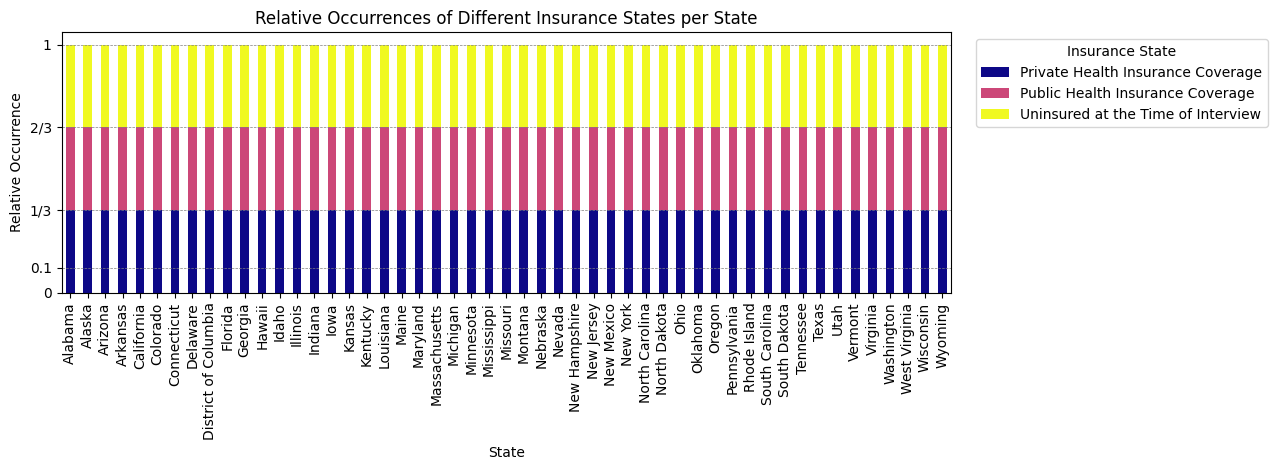

In [100]:
# YOUR CODE HERE
df_csv = pd.read_csv('./data/data_notebook-2_Insurance_coverage.csv.csv')

# Remove all Rows with NA and filter out "United States"
df_csv = df_csv.dropna()
df_filtered = df_csv[df_csv['By State'] != 'United States']


# Pivot the data to get counts of each insurance type per state
insurance_pivot = df_filtered.pivot_table(index='By State', columns='Insurance state', aggfunc='size')

# Relative pivot data of each insurance type per state
# Idea form https://stackoverflow.com/questions/40439370/pandas-pivot-table-trouble-with-dividing-by-sum-of-rows
insurance_relative = insurance_pivot.div(insurance_pivot.sum(1), 0)

# Create a stacked bar chart with the insurance_relative data
plt.figure(figsize=(16, 7))
insurance_relative.plot(kind='bar', stacked=True, width = 0.5, colormap = "plasma") # Color plasma because it looks quite good
plt.title('Relative Occurrences of Different Insurance States per State')
plt.xlabel('State')
plt.ylabel('Relative Occurrence')
# Rotate x-ticks that the state names are readable 
plt.xticks(rotation=90, fontsize=10)
# Move the legend next to the plot
plt.legend(title='Insurance State', bbox_to_anchor=(1.02, 1), loc='upper left')

# Setting y-values and labels 
tick_values = [0, 0.1, 1/3, 2/3, 1.0]
tick_labels = ['0', '0.1', '1/3', '2/3', '1']
plt.yticks(tick_values, tick_labels)


# Adding grid lines at y-ticks
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='gray', axis='y')

# Using tight_layout to stretch the plot that it looks better
# Got the idea from https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html
plt.tight_layout(rect=(0, 0, 2, 1))
plt.show()



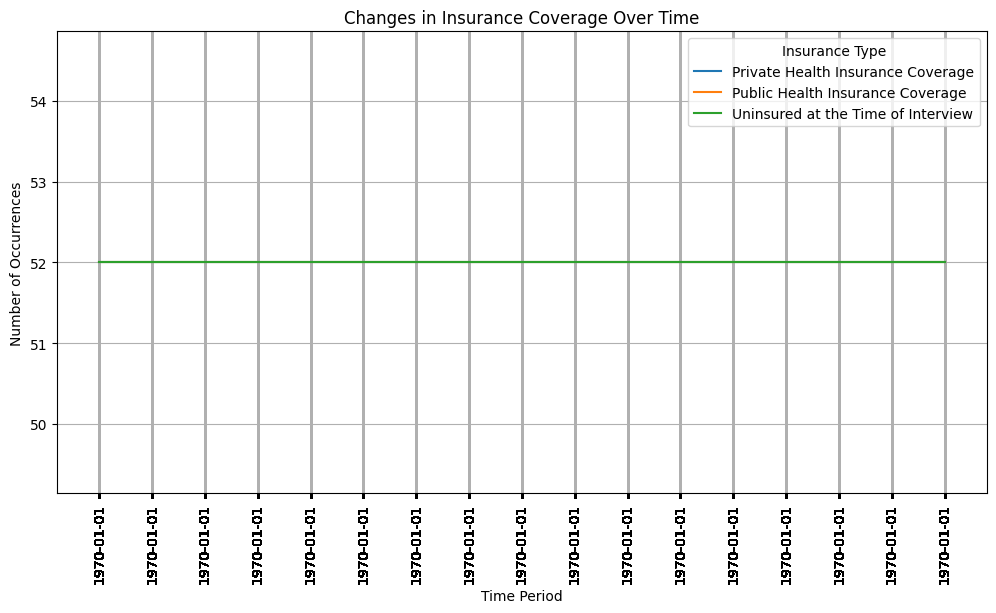

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./data/data_notebook-2_Insurance_coverage.csv.csv')

# Ensure the date column is parsed into datetime format
data['Time Period'] = pd.to_datetime(data['Time Period'])

# Aggregate data by date, summing up occurrences of each insurance type
time_series_data = data.groupby(['Time Period', 'Insurance state']).size().unstack()

# Plotting the data
plt.figure(figsize=(12, 6))
for column in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[column], label=column)

plt.title('Changes in Insurance Coverage Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Occurrences')
plt.legend(title='Insurance Type')
plt.xticks(data['Time Period'], rotation = 90)
plt.grid(True)
plt.show()


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

* The task supported by the visualization in the project is to compare proportions and distributions across multiple categories (states) and subcategories (insurance status). Saket et al. discuss how different visualization types support different tasks, highlighting that some are better suited for comparison tasks. In the paper is states that bar charts are one of the best visualization methods for distributions based on accuracy. 
* A stacked bar chart is selected for its effectiveness in illustrating part-whole relationships within each state. This helps in promptly evaluating the proportion of each insurance state relative to the total within each geographic category. This visualization type is in line with the discoveries of Saket et al., who emphasize that bar charts are especially effective for comparison tasks and for understanding distributions within categories. This stacked bar chart is therefore effective because it displays the relative quantity of a categorical data across different groups. 
* The visualization specifically shows the relative occurrences of different insurance states (Private Health Insurance Coverage, Public Health Insurance Coverage, Uninsured at the Time of Interview) for each state over the entire timeframe of the interviews. The entire timeframe is chosen, because the insurance type does not change over time (see plot below) and the focus on this individual visualization lies within the regional differences. This allows for an immediate visual comparison of insurance status distributions across states, facilitating an understanding of how insurance coverage varies regionally. The visualization shows that the occurrences of different insurance states (Private Health, Public Health, and Uninsured) is uniformly distributed across all states. This means that the density of each insurance state is the same across all states. In real-world data, there would typically be variation in insurance coverage rates across different states. That means that the dataset lacks of variability.



![Alt text](./data/plot.jpg "Time Period Insurance Type Change")



 * The visualization is clear, but it highlights a significant limitation in the underlying dataset. The data is uniform distribution across all states, which does not reflect real-world variability. This indicates a need for a more detailed dataset to accurately assess the impact of insurance coverage on the severity of anxiety symptoms during the COVID-19 pandemic. Without varied insurance coverage data, a correlation between insurance status and mental health outcomes across different regions is not really meaningful and does not lead to an informative result.

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [91]:
import pandas as pd
csv_data = pd.read_csv('./data/Indicators_of_Health_Insurance_Coverage_at_the_Time_of_Interview_(Last).csv')
json_data = pd.read_json('./data/Indicators_of_Anxiety_and_Depression.json')
# if the na count in a column exceeds the threshold, drop the column
threshold = 0.95
empty_columns = csv_data.columns[csv_data.isna().mean() >= threshold].tolist()
csv_data.drop(columns=empty_columns, inplace=True)
#print(csv_data.info())         Leaving these here to check 
#print(json_data.info())

#leaving this chunk here as well if anyone wants to check for unique values
'''
print("Unique values in 'State' column of CSV data:")
print(csv_data['By State'].unique())

print("\nUnique values in 'State' column of JSON data:")
print(json_data['State'].unique())

# Check for leading/trailing whitespaces
print("\nNumber of leading/trailing whitespaces in 'State' column of CSV data:")
print(csv_data['By State'].str.strip().str.len().value_counts())

print("\nNumber of leading/trailing whitespaces in 'State' column of JSON data:")
print(json_data['State'].str.strip().str.len().value_counts())

# Fix leading/trailing whitespaces and rename columns for consistency
'''
# Adjusting column names for the merge
csv_data['By State'] = csv_data['By State'].str.strip()
csv_data.rename(columns={'By State': 'State'}, inplace=True)
json_data['State'] = json_data['State'].str.strip()

# Check for duplicate entries in the datasets
duplicate_states_csv = csv_data[csv_data.duplicated(subset=['State'], keep=False)]
duplicate_states_json = json_data[json_data.duplicated(subset=['State'], keep=False)]

print("Duplicate entries in CSV data:")
print(duplicate_states_csv)

print("\nDuplicate entries in JSON data:")
print(duplicate_states_json)
'''
# Convert data types if necessary
csv_data['State'] = csv_data['State'].astype(str)
json_data['State'] = json_data['State'].astype(str)

# New datasets with nas dropped
newjson = json_data.dropna(inplace = True)
newcsv = csv_data.dropna()
print(newcsv.isnull().sum())
print(json_data.isnull().sum())

# Merging the two Datasets 
combined_data = pd.merge(json_data, newcsv, on=['State'], how='inner')

# We have 135.201 entries, explore why 

# Dropping the columns with na vals
combined_data.dropna(axis=1, how='all', inplace=True)

# Dropping the rows with na values
combined_data.dropna(axis=0, inplace=True)

print(combined_data.info())
print(combined_data.isnull().sum())
num_duplicates = combined_data.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Verify the integrity of the data
for column in combined_data.columns:
    unique_values = combined_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    

#print(combined_data.describe())
'''
#raise NotImplementedError()

Duplicate entries in CSV data:
                         Insurance state          State  Insurance class  \
0     Uninsured at the Time of Interview        Alabama                1   
1     Uninsured at the Time of Interview         Alaska                1   
2     Uninsured at the Time of Interview        Arizona                1   
3     Uninsured at the Time of Interview       Arkansas                1   
4     Uninsured at the Time of Interview     California                1   
...                                  ...            ...              ...   
2647    Public Health Insurance Coverage  United States                2   
2648   Private Health Insurance Coverage  United States                2   
2649  Uninsured at the Time of Interview  United States                2   
2650    Public Health Insurance Coverage  United States                2   
2651   Private Health Insurance Coverage  United States                2   

      Time Period      Time Period Label  
0            

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 4  (1 points)

Persist the merged dataset (Step 3) as a file and save the plot created in Step 3 as a [file](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) (format: `svg`).

In [ ]:
combined_data.to_csv('./data/combined_data.csv', index = False)       # Check this when you have nice combined data
plt.savefig('RENAME_THIS_LATER.svg', format='svg')                    # Rename 

#raise NotImplementedError()